In [1]:
import pandas as pd
import json_lines
import re
import numpy as np

def read_data_from_jl(file_path):
    with open(file_path, 'rb') as f:
        data = json_lines.reader(f)

        df = pd.DataFrame(data)
        
        return df
    return None

In [2]:
df = read_data_from_jl('../data/thuephongtro.jl')
df.head(10)

,description,location,kind,price,area,date
0,\r\n \r\n ...,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",Cho thuê phòng trọ,3.7 Triệu/tháng,28 m²,08/11/2020 09:09
1,\r\n \r\n ...,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",Cho thuê phòng trọ,3 Triệu/tháng,30 m²,01/11/2020 14:35
2,\r\n \r\n ...,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",Cho thuê phòng trọ,4 Triệu/tháng,32 m²,02/11/2020 15:41
3,\r\n \r\n ...,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",Cho thuê phòng trọ,7 Triệu/tháng,50 m²,04/11/2020 19:08
4,\r\n \r\n ...,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",Cho thuê phòng trọ,999 Triệu/tháng,36 m²,05/11/2020 10:40
5,\r\n \r\n ...,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",Cho thuê phòng trọ,3.8 Triệu/tháng,36 m²,05/11/2020 13:49
6,\r\n \r\n ...,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",Cho thuê phòng trọ,3.2 Triệu/tháng,38 m²,06/11/2020 15:31
7,\r\n \r\n ...,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",Cho thuê phòng trọ,2 Triệu/tháng,35 m²,07/11/2020 11:56
8,\r\n \r\n ...,"Phường Việt Hưng, Long Biên, Hà Nội",Cho thuê phòng trọ,3 Triệu/tháng,38 m²,07/11/2020 12:54
9,\r\n \r\n ...,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",Cho thuê phòng trọ,2.5 Triệu/tháng,24 m²,30/10/2020 11:43


In [3]:
des = df['description'].values
price = df['price'].values
area = df['area'].values
kind = df['kind'].values
data = pd.DataFrame()

In [4]:
a = []
pattern = '^([0-9]+.[0-9]+|[0-9]+)'
price = df['price'].values
for p in price:
    result = re.findall(pattern, p)
    if result:
        a.append(float(result[0]))
    else:
        a.append(0)

data['Price'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price
0,3.7
1,3.0
2,4.0
3,7.0
4,999.0
5,3.8
6,3.2
7,2.0
8,3.0
9,2.5


In [5]:
data["Description"] = df['description']

In [6]:
a = []
pattern1 = '(CCMN|[Cc]hung cư)'
pattern2 = '[Hh]omestay'
for d in des:
    ccmn = re.findall(pattern1, d)
    hs = re.findall(pattern2, d)
    if ccmn:
        a.append("CCMN")
    elif hs:
        a.append("Homestay")
    else:
        a.append("Phòng trọ")

data['Kind'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind
0,3.7,\r\n \r\n ...,CCMN
1,3.0,\r\n \r\n ...,Phòng trọ
2,4.0,\r\n \r\n ...,CCMN
3,7.0,\r\n \r\n ...,Phòng trọ
4,999.0,\r\n \r\n ...,Phòng trọ
5,3.8,\r\n \r\n ...,CCMN
6,3.2,\r\n \r\n ...,CCMN
7,2.0,\r\n \r\n ...,Phòng trọ
8,3.0,\r\n \r\n ...,CCMN
9,2.5,\r\n \r\n ...,Phòng trọ


In [7]:
data['Location'] = df['location']
data.head(10)

,Price,Description,Kind,Location
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm..."
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T..."
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H..."
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội"
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội"
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà..."
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà..."
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội"
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội"
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường..."


In [8]:
b = []
pattern = '^[0-9]+'
for a in area:
    result = re.findall(pattern, a)
    if result:
        b.append(int(result[0]))
    else:
        b.append(0)

data['Size'] = pd.Series(np.array(b), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24


In [9]:
# add parking area
a = []
pattern = '[Đđ]ể xe'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Parking_slot'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0


In [10]:
a = []
pattern = '[Đđ]iều hòa'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Air_condition'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1,0
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1,1
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0,0


In [11]:
a = []
pattern = '[Nn]óng lạnh'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Heater_shower'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1,1
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0,0
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0,0,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1,0,0
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1,1,1
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0,0,1


In [12]:
a = []
pattern = '([Tt]ủ|[Ff]ull đồ|tivi|nội thất đầy đủ)'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Furnish'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1,1
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1,1
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1,1,1
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0,0,1
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0,0,0,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1,0,0,0
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1,1,1,0
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0,0,1,0


In [13]:
a = []
pattern = 'khép kín'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Inner_toilet'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1,1,1
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0,1
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1,1,0
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1,0
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1,1,1,1
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0,0,1,0
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0,0,0,0,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1,0,0,0,1
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1,1,1,0,0
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0,0,1,0,0


In [14]:
a = []
pattern = '[Tt]ổng diện tích'
for d in des:
    result = re.findall(pattern, d)
    if result:
        a.append(1)
    else:
        a.append(0)

data['Size_total_bool'] = pd.Series(np.array(a), index=df.index)
data.head(10)

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1,1,1,0
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0,1,0
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1,1,0,0
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1,0,0
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1,1,1,1,0
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0,0,1,0,0
6,3.2,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",38,0,0,0,0,0,0
7,2.0,\r\n \r\n ...,Phòng trọ,"Đường Lạc Thị, Xã Ngọc Hồi, Thanh Trì, Hà Nội",35,1,0,0,0,1,0
8,3.0,\r\n \r\n ...,CCMN,"Phường Việt Hưng, Long Biên, Hà Nội",38,1,1,1,0,0,0
9,2.5,\r\n \r\n ...,Phòng trọ,"Ngõ 40/60/11 số nhà 9,Phố Tạ Quang Bửu, Phường...",24,0,0,1,0,0,0


In [15]:
data['Source'] = "thuephongtro"
data

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1,1,1,0,thuephongtro
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0,1,0,thuephongtro
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1,1,0,0,thuephongtro
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1,0,0,thuephongtro
4,999.0,\r\n \r\n ...,Phòng trọ,"Đường Ao Sen, Phường Mỗ Lao, Hà Đông, Hà Nội",36,0,1,1,1,1,0,thuephongtro
...,...,...,...,...,...,...,...,...,...,...,...,...
3174,2.5,\r\n \r\n ...,Phòng trọ,"28 402/42/22 Đường Đình Thôn, Phường Mỹ Đình 1...",30,1,0,1,0,0,0,thuephongtro
3175,1800.0,\r\n \r\n ...,CCMN,"Đường Giáp Nhị, Phường Thịnh Liệt, Hoàng Mai, ...",27,0,0,0,0,1,0,thuephongtro
3176,3.7,\r\n \r\n ...,Phòng trọ,"Đường Lê Quang Đạo, Phường Phú Đô, Nam Từ Liêm...",30,0,1,1,1,1,0,thuephongtro
3177,5.5,\r\n \r\n ...,CCMN,"Ngõ 23 Đường Nguyễn Thị Định, Phường Trung Hòa...",35,0,0,0,0,0,0,thuephongtro


In [16]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error

# y = data.values[:, 0]
# x = data.drop(['Location','Source'], axis=1).values[:, 1:]
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# clf = Lasso(alpha=0.1)
# clf.fit(x_train, y_train)
# mean_absolute_error(y_test, clf.predict(x_test))

In [17]:
# data.to_csv("../processed-data/thuephongtro.csv")

In [18]:
data['Price'].describe()

count      3179.000000
mean        890.719518
std       20303.106922
min           0.000000
25%           1.200000
50%           1.800000
75%           2.500000
max      900000.000000
Name: Price, dtype: float64

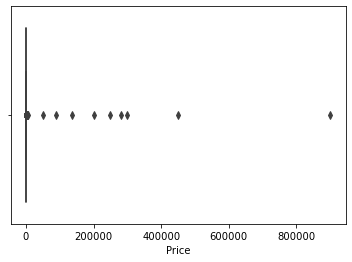

In [19]:
import seaborn as sns

sns.boxplot(data['Price'])

In [20]:
new_data = data[data['Price'] <= 15]
new_data

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,0,1,1,1,1,0,thuephongtro
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0,1,0,thuephongtro
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,0,1,1,1,0,0,thuephongtro
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1,0,0,thuephongtro
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,0,0,1,0,0,thuephongtro
...,...,...,...,...,...,...,...,...,...,...,...,...
3173,15.0,\r\n \r\n ...,Phòng trọ,"374c, đường Mỹ Đình, Phường Mỹ Đình 1, Nam Từ ...",30,0,0,0,0,0,0,thuephongtro
3174,2.5,\r\n \r\n ...,Phòng trọ,"28 402/42/22 Đường Đình Thôn, Phường Mỹ Đình 1...",30,1,0,1,0,0,0,thuephongtro
3176,3.7,\r\n \r\n ...,Phòng trọ,"Đường Lê Quang Đạo, Phường Phú Đô, Nam Từ Liêm...",30,0,1,1,1,1,0,thuephongtro
3177,5.5,\r\n \r\n ...,CCMN,"Ngõ 23 Đường Nguyễn Thị Định, Phường Trung Hòa...",35,0,0,0,0,0,0,thuephongtro


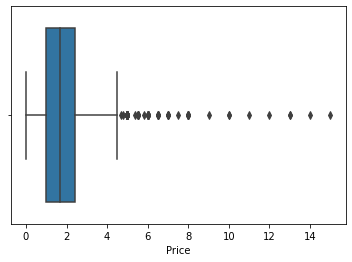

In [21]:
sns.boxplot(new_data["Price"])

In [43]:
new_data.loc[new_data["Kind"] == "CCMN", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Heater_shower"] = 1
new_data.loc[new_data["Kind"] == "CCMN", "Inner_toilet"] = 1

new_data.loc[new_data["Kind"] == "Homestay", "Parking_slot"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Air_condition"] = 1
new_data.loc[new_data["Kind"] == "Homestay", "Heater_shower"] = 1

In [41]:
new_data.loc[new_data["Kind"] == "CCMN", "Parking_slot"] = 1

In [48]:
new_data

,Price,Description,Kind,Location,Size,Parking_slot,Air_condition,Heater_shower,Furnish,Inner_toilet,Size_total_bool,Source
0,3.7,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Mỹ Đình 1, Nam Từ Liêm...",28,1,1,1,1,1,0,thuephongtro
1,3.0,\r\n \r\n ...,Phòng trọ,"Đường Dương Văn Bé, Phường Vĩnh Tuy, Hai Bà T...",30,1,0,1,0,1,0,thuephongtro
2,4.0,\r\n \r\n ...,CCMN,"Đường Phạm Hùng, Phường Trung Hòa, Cầu Giấy, H...",32,1,1,1,1,1,0,thuephongtro
3,7.0,\r\n \r\n ...,Phòng trọ,"đường Võng Thị, Phường Bưởi, Tây Hồ, Hà Nội",50,1,0,1,1,0,0,thuephongtro
5,3.8,\r\n \r\n ...,CCMN,"Đường Đồng Me, Phường Mễ Trì, Nam Từ Liêm, Hà...",36,1,1,1,1,1,0,thuephongtro
...,...,...,...,...,...,...,...,...,...,...,...,...
3173,15.0,\r\n \r\n ...,Phòng trọ,"374c, đường Mỹ Đình, Phường Mỹ Đình 1, Nam Từ ...",30,0,0,0,0,0,0,thuephongtro
3174,2.5,\r\n \r\n ...,Phòng trọ,"28 402/42/22 Đường Đình Thôn, Phường Mỹ Đình 1...",30,1,0,1,0,0,0,thuephongtro
3176,3.7,\r\n \r\n ...,Phòng trọ,"Đường Lê Quang Đạo, Phường Phú Đô, Nam Từ Liêm...",30,0,1,1,1,1,0,thuephongtro
3177,5.5,\r\n \r\n ...,CCMN,"Ngõ 23 Đường Nguyễn Thị Định, Phường Trung Hòa...",35,1,1,1,0,1,0,thuephongtro


In [51]:
new_data.to_csv("../processed-data/thuephongtro.csv")